# 결측치 찾기

- 결측치의 의의
  - 누락된 값, 비어있는 값
  - 결측치가 있으면 함수가 적용되지 않거나 분석 결과가 왜곡되는 현상이 발생
  - 결측치를 제거 한 후 분석 실시
  - 표기법 : 대문자 NA(따옴표 없음)
    - Not Available 

In [2]:
df <- data.frame(
  sex = c("M", "F", NA, "M", "F"),
  score = c(5, 4, 3, 4, NA)
)
df

sex,score
<chr>,<dbl>
M,5
F,4
NA,3
M,4
F,NA


In [3]:
# 결측치 확인
is.na(df)

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [4]:
# 결측치 빈도 출력
table(is.na(df))


FALSE  TRUE 
    8     2 

In [5]:
# 각 변수별로 결측치 확인
table(is.na(df$sex))
table(is.na(df$score))


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    4     1 

In [6]:
# 결측치가 포함된 상태로 분석
mean(df$score) # 결측치가 있는 상태로는 연산을 할 수 없다.

[1] NA

In [7]:
sum(df$score) # 비어 있는 값(NA)를 어떻게 처리해줘야 할지 모르기 때문에 NA값이 출력되게 된다.

[1] NA

# 결측치 제거하기

In [8]:
# dplyr 패키지 로드
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# score가 NA인 데이터만 출력
df %>% 
  filter(is.na(score))

sex,score
<chr>,<dbl>
F,NA


In [12]:
# score가 결측치가 아닌 데이터만 출력
# ! : 부정(not)
df %>%
  filter(!is.na(score))

sex,score
<chr>,<dbl>
M,5
F,4
NA,3
M,4


In [13]:
# 결측치 제외한 데이터로 분석하기
df_nomiss <- df %>%
  filter(!is.na(score))

# score 평균 산출
mean(df_nomiss$score)

# score 합계 산출
sum(df_nomiss$score)

[1] 4

[1] 16

In [14]:
# 여러 변수에 동시에 결측치가 없는 데이터 추출하기
# score, sex 결측치 제외
df_nomiss <- df %>%
  filter(!is.na(score) & !is.na(sex))

df_nomiss

sex,score
<chr>,<dbl>
M,5
F,4
M,4


In [15]:
# 결측치가 하나라도 있으면 제거
# 모든 변수에 결측치 없는 데이터 추출
# 현업에서는 분석에 사용가능한 행까지 지나치게 제거될 가능성이 있어서 비추천
df_nomiss2 <- na.omit(df)
df_nomiss2

,sex,score
,<chr>,<dbl>
1,M,5
2,F,4
4,M,4


## 함수의 결측제 제외 기능

In [16]:
# 결측치를 제외한 평균
mean(df$score, na.rm = T)

[1] 4

In [17]:
# 결측치를 제외한 합계
sum(df$score, na.rm = T)

[1] 16

In [18]:
exam <- read.csv("/content/csv_exam.csv")

In [19]:
exam[c(3, 8, 15), "math"] <- NA # exam 데이터의 3, 8, 15행의 math열에 NA라는 값을 삽입하겠다
head(exam)

,id,class,math,english,science
,<int>,<int>,<int>,<int>,<int>
1,1,1,50,98,50
2,2,1,60,97,60
3,3,1,NA,86,78
4,4,1,30,98,58
5,5,2,25,80,65
6,6,2,50,89,98


In [21]:
# 평균
exam %>%
  summarise(mean_math = mean(math))

mean_math
<dbl>
NA


In [22]:
# 결측치 제외하고 계산한 평균
exam %>%
  summarise(mean_math = mean(math, na.rm = T))

mean_math
<dbl>
55.23529


In [23]:
exam %>%
  summarise(
    mean_math = mean(math, na.rm = T),
    sum_math = sum(math, na.rm = T),
    median_math = median(math, na.rm = T)
  )

mean_math,sum_math,median_math
<dbl>,<int>,<int>
55.23529,939,50


# 결측치 대체하기

- 데이터가 적고, 결측치가 많은 경우. 모든 결측치 데이터를 제외하면 데이터의 손실이 너무 크다
- 대안 : 다른 값 채워넣기

## 결측치 대체법
- 대표값(평균, 최빈값 등)으로 일괄대체
- 통계분석 기법 적용, 예측값을 추정해서 대체

In [24]:
# 평균값으로 대체하기
# 결측값 제외하고 math 평균 산출
mean(exam$math, na.rm = T)

[1] 55.23529

In [25]:
# math가 NA면 평균으로 대체
exam$math <- ifelse(is.na(exam$math), 55, exam$math)
table(is.na(exam$math))


FALSE 
   20 

In [26]:
head(exam)

,id,class,math,english,science
,<int>,<int>,<dbl>,<int>,<int>
1,1,1,50,98,50
2,2,1,60,97,60
3,3,1,55,86,78
4,4,1,30,98,58
5,5,2,25,80,65
6,6,2,50,89,98


### mpg 데이터를 이용한 실습

In [34]:
# mpg 데이터에 결측치 생성
mpg <- as.data.frame(ggplot2::mpg)
mpg[c(65, 124, 131, 153, 212), "hwy"] <- NA
table(is.na(mpg$hwy))


FALSE  TRUE 
  229     5 

*요구사항* : drv(구동방식)별로 hwy 평균이 어떻게 다른지 알아보려고 한다<br>

*분석계획* : <br>
1. 분석에 앞서서 결측치 확인
2. 구동방식별 hwy 평균을 구하기

In [36]:
# 결측치 확인
table(is.na(mpg$hwy))


FALSE  TRUE 
  229     5 

In [35]:
# 1버전
mpg %>%
  filter(!is.na(hwy)) %>%
  group_by(drv) %>%
  summarise(mean_hwy = mean(hwy))

drv,mean_hwy
<chr>,<dbl>
4,19.24242
f,28.20000
r,21.00000


In [37]:
# 2버전
mpg %>%
  group_by(drv) %>%
  summarise(mean_hwy = mean(hwy, na.rm = T))

drv,mean_hwy
<chr>,<dbl>
4,19.24242
f,28.20000
r,21.00000


# 이상치 정제

- 이상치(Outlier)의 의의
  - 정상 범주에서 크게 벗어난 값
  - 데이터 수집 과정에서의 오류 또는 극단적인 값
  - 이상치 포함 시 분석 결과가 왜곡됨

- 이상치의 종류
  - 존재할 수 없는 값
    - 예) 성별 변수에 3
      - 결측 처리
  
  - 극단적인 값
    - 예) 몸무게 변수에 200
      - 정상범위 기준 정해서 결측 처리

In [38]:
# 존재할 수 없는 값 제거
df_outlier <- data.frame(
  sex = c(1, 2, 1, 3, 2, 1),
  score = c(5, 4, 3, 4, 2, 6)
)

df_outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
3,4
2,2
1,6


In [39]:
# 이상치 확인하기
table(df_outlier$sex)
table(df_outlier$score)


1 2 3 
3 2 1 


2 3 4 5 6 
1 1 2 1 1 

In [40]:
# sex가 3이면 NA 할당
df_outlier$sex <- ifelse(df_outlier$sex == 3, NA, df_outlier$sex)

df_outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
NA,4
2,2
1,6


In [42]:
# score가 1 ~ 5가 아니면 NA 할당
df_outlier$score <- ifelse(df_outlier$score > 5, NA, df_outlier$score)

df_outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
NA,4
2,2
1,NA


In [43]:
# 변환된 결측치를 제외하고 분석
df_outlier %>%
  filter(!is.na(sex) & !is.na(score)) %>%
  group_by(sex) %>%
  summarise(mean_score = mean(score))

sex,mean_score
<dbl>,<dbl>
1,4
2,3


- 극단치
  - 정상범위의 기준을 정해서 이를 벗어나면 결측 처리

- 정상범위 판단기준
  - 논리적 판단
    - 성인 몸무게 40kg ~ 150kg 벗어나면 극단치
  - 통계적 판단
    - 상하위 0.3% 또는 상자그림에서 1.5IQR을 벗어나면 극단치

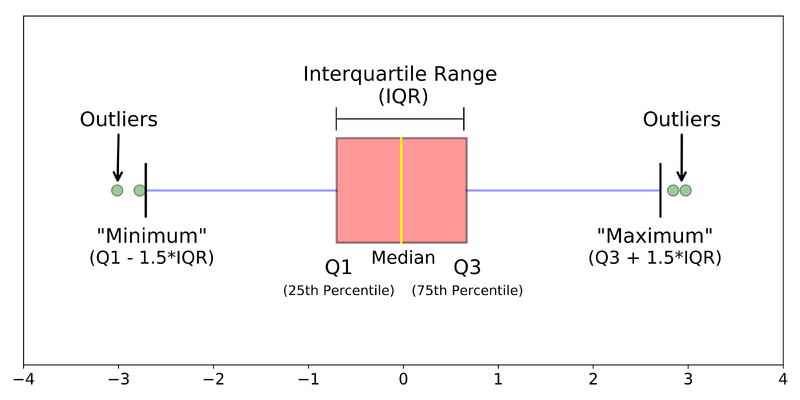

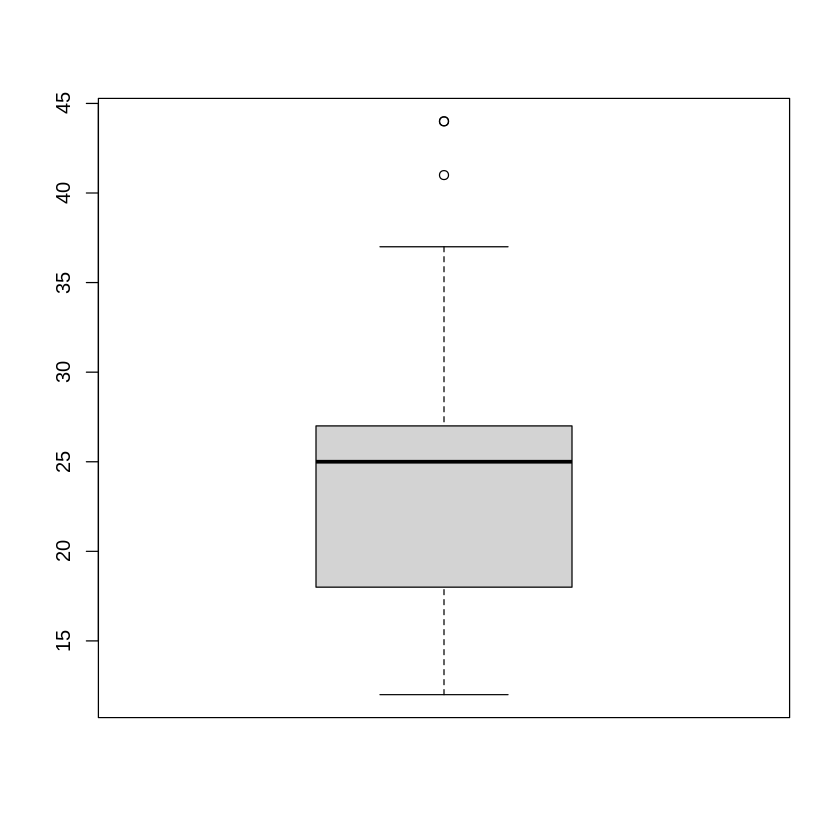

In [44]:
boxplot(mpg$hwy)

12
18
25
27
37


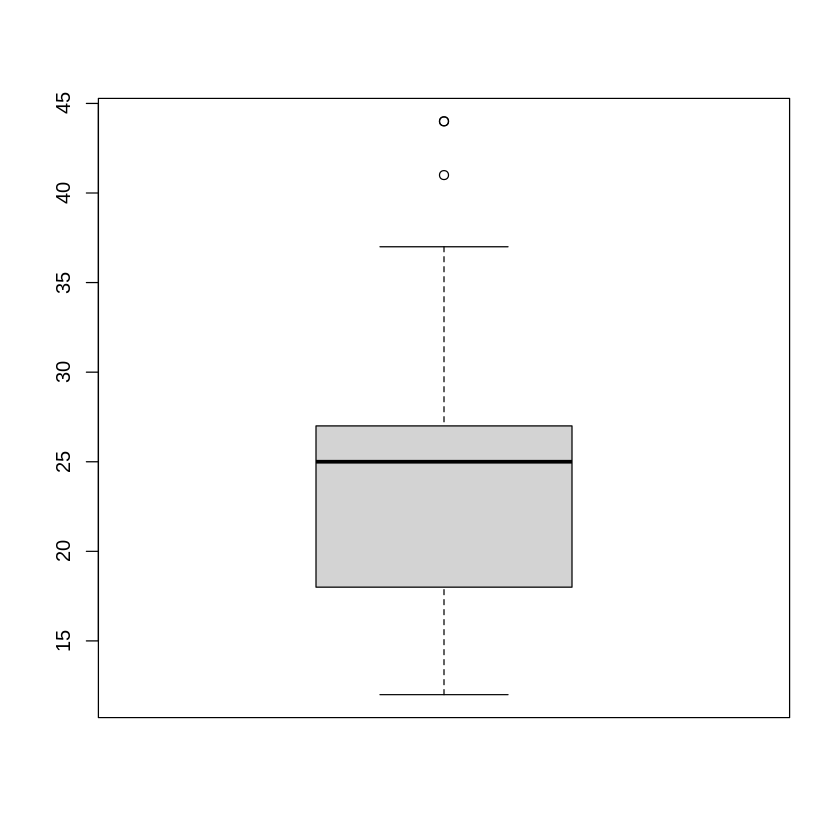

In [45]:
boxplot(mpg$hwy)$stats # 상자 그림 통계치 출력
# 아래쪽 극단치 경계(Minimum), 1사분위수, 중앙값, 3사분위수, 위쪽 극단치 경계(Maximum)

In [46]:
# 12 ~ 37 벗어나면 NA 할당
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)
table(is.na(mpg$hwy))


FALSE  TRUE 
  226     8 

In [47]:
# 극단치 정제 후 데이터 분석
mpg %>%
  group_by(drv) %>%
  summarise(mean_hwy = mean(hwy, na.rm = T))

drv,mean_hwy
<chr>,<dbl>
4,19.24242
f,27.76471
r,21.00000


# mpg 데이터 분석 연습

**분석계획** : <br>

drv, cty 변수에 이상치 할당 <br>

1. drv에 이상치가 있는지 확인한 뒤, 이상치를 결측 처리한 후 이상치가 잘 처리 되었는지 확인

2. 상자 그림을 이용해 cty에 이상치가 있는지 확인하고 그림 통계치에서 정상범위를 벗어난 값을 결측처리. 그 후 다시 상자그림을 만들어 이상치가 있는지 확인

3. 이상치를 제외한 다음 drv별로 cty 평균이 어떻게 다른지 확인

In [61]:
mpg <- as.data.frame(ggplot2::mpg) # 데이터 불러오기
mpg[c(10, 14, 58, 93), "drv"] <- "k" # drv 이상치 할당
mpg[c(29, 43, 129, 203), "cty"] <- c(3, 4, 39, 42) # cty 이상치 할당

In [62]:
# 1-1. 이상치가 있는지 확인
table(mpg$drv)


  4   f   k   r 
100 106   4  24 

In [64]:
# 1-2. 이상치를 결측 처리한 후 이상치가 잘 처리되었는지 확인
mpg$drv <- ifelse(mpg$drv %in% c("4", "r", "f"), mpg$drv, NA)

table(mpg$drv)


  4   f   r 
100 106  24 

9
14
17
19
26


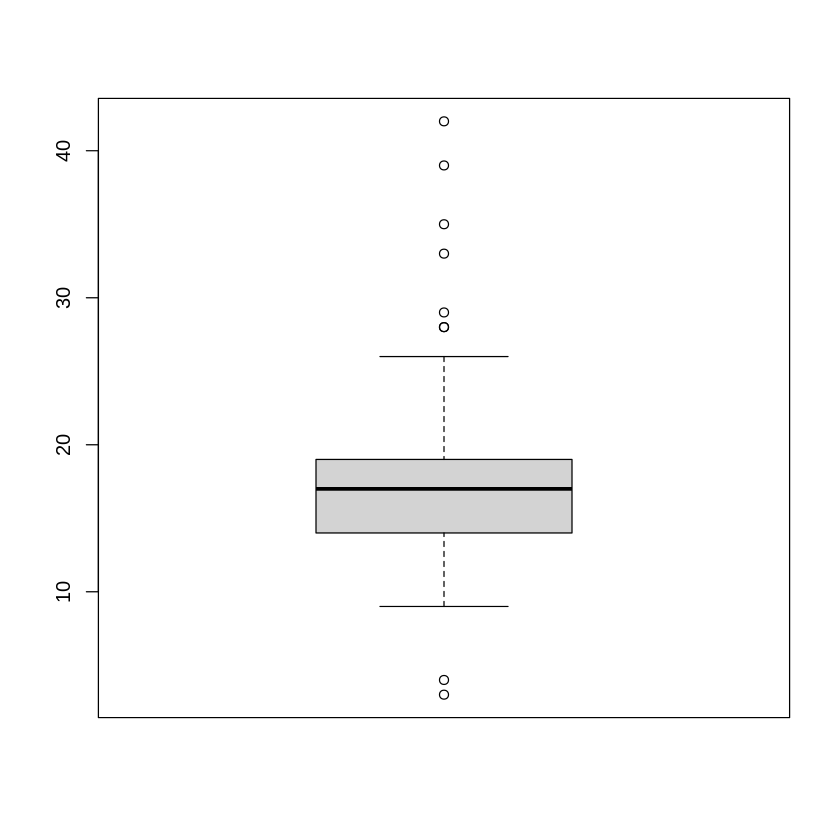

In [65]:
# 2-1. 상자 그림을 이용해 cty에 이상치가 있는지 확인
boxplot(mpg$cty)$stats

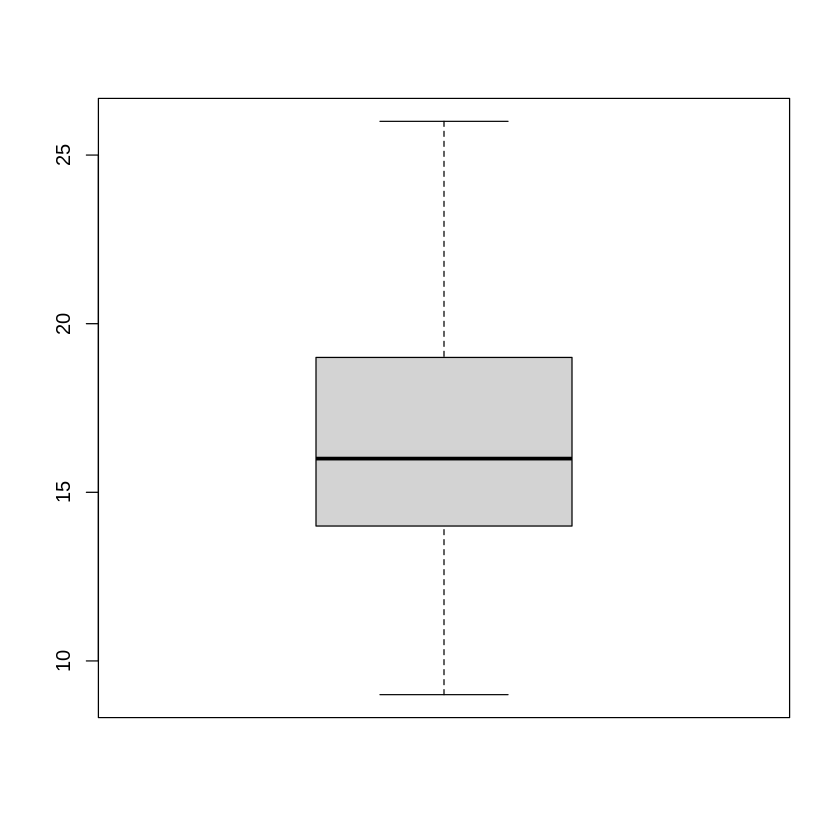

In [66]:
# 2-2. 정상범위를 벗어난 값을 결측처리
mpg$cty <- ifelse(mpg$cty < 9 | mpg$cty > 26, NA, mpg$cty)

boxplot(mpg$cty)

In [67]:
# 3. 이상치를 제외한 다음 drv별로 cty 평균이 어떻게 다른지 확인
mpg %>%
  filter(!is.na(drv) & !is.na(cty)) %>%
  group_by(drv) %>%
  summarise(mean_cty = mean(cty))

drv,mean_cty
<chr>,<dbl>
4,14.24742
f,19.47000
r,13.95833
